# DOGRUSAL OLMAYAN REGRESYON MODELLERİ

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,ShuffleSplit,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

# K- En Yakın Komsu (KNN)
* Tahminler gözlem benzerligine göre yapılır

In [ ]:
# büyük veri setlerinde çok performanslı oldugu söylenemez.
# verilen gözlem birine en yakın olan gözlem birimine bakarak bagımlı degiskeni bize verir.
# verilen gözlemin her bir gözleme olan uzaklıgı hesaplanır.en yakın olan k=5 seçilirse;
# bu bulunan 5 degerin bagımlı degiskenlerinin ortalması alınarak verilen gözlemin bagımlı degisken degeri bulunmus olur.

* KNN Basamakları
    - Komsu sayısını belirle
    - Bilinmeyen nokta ile diger tüm noktalar arasındaki uzaklıkları hesapla
    - Uzaklıkları sırala ve belirlenen k sayısına göre en yakın olan k gözlemi sec
    - Sınıflandırma ise en sık sınıf ,regresyon ise ortalama degeri tahmin olarak ver

# KNN - MODEL

In [5]:
hit=pd.read_csv("original.csv")# American basketbol ligi 
df=hit.copy()
df=df.dropna()
dms= pd.get_dummies(df[['League','Division','NewLeague']])
y=df["Salary"]
X_= df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
# veri setini test ve train olarak ayırdık
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                              random_state=42)
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training= df.copy()# tüm veri seti
print("training",training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


In [6]:
knn_model=KNeighborsRegressor().fit(X_train,y_train)

In [7]:
knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [8]:
knn_model.n_neighbors

5

# KNN - TAHMİN

In [9]:
y_pred=knn_model.predict(X_test)

In [10]:
np.sqrt(mean_squared_error(y_test,y_pred))

426.6570764525201

In [15]:
RMSE =[]

for k in range(10):
    k=k+1
    knn_model=KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    y_pred=knn_model.predict(X_train)
    rmse=np.sqrt(mean_squared_error(y_train,y_pred))
    RMSE.append(rmse)
    print("k= ",k,"icin RMSE degeri:",rmse)

k=  1 icin RMSE degeri: 0.0
k=  2 icin RMSE degeri: 179.52761335480352
k=  3 icin RMSE degeri: 205.20157172291863
k=  4 icin RMSE degeri: 220.5139794876305
k=  5 icin RMSE degeri: 239.64671325413764
k=  6 icin RMSE degeri: 243.5904190007242
k=  7 icin RMSE degeri: 258.1478781634636
k=  8 icin RMSE degeri: 266.05374203349805
k=  9 icin RMSE degeri: 269.73782093553376
k=  10 icin RMSE degeri: 271.2798300436963


# KNN - MODEL TUNİNG

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
knn_params={'n_neighbors':np.arange(1,30,1)}# 1 den 30 kadar k degerleri ürettik

In [18]:
knn=KNeighborsRegressor()

In [20]:
knn_cv_model=GridSearchCV(knn,knn_params,cv=10)

In [23]:
knn_cv_model.fit(X_train,y_train)

C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [24]:
knn_cv_model.best_params_["n_neighbors"]

8

In [25]:
RMSE =[]
RMSE_CV=[]

for k in range(10):
    k=k+1
    knn_model=KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    y_pred=knn_model.predict(X_train)
    rmse=np.sqrt(mean_squared_error(y_train,y_pred))
    rmse_cv=np.sqrt(-1*cross_val_score(knn_model,X_train,y_train,cv=10,
                                      scoring="neg_mean_squared_error").mean())
    RMSE.append(rmse)
    RMSE_CV.append(rmse_cv)
    print("k= ",k,"icin RMSE degeri:",rmse,"RMSE_CV_degeri:",rmse_cv)

k=  1 icin RMSE degeri: 0.0 RMSE_CV_degeri: 325.39475147063825
k=  2 icin RMSE degeri: 179.52761335480352 RMSE_CV_degeri: 293.24000183333817
k=  3 icin RMSE degeri: 205.20157172291863 RMSE_CV_degeri: 283.7486667487823
k=  4 icin RMSE degeri: 220.5139794876305 RMSE_CV_degeri: 286.3240222024089
k=  5 icin RMSE degeri: 239.64671325413764 RMSE_CV_degeri: 290.0705466132226
k=  6 icin RMSE degeri: 243.5904190007242 RMSE_CV_degeri: 298.1263115575851
k=  7 icin RMSE degeri: 258.1478781634636 RMSE_CV_degeri: 294.77070479194987
k=  8 icin RMSE degeri: 266.05374203349805 RMSE_CV_degeri: 291.98672028891235
k=  9 icin RMSE degeri: 269.73782093553376 RMSE_CV_degeri: 295.7162739573105
k=  10 icin RMSE degeri: 271.2798300436963 RMSE_CV_degeri: 301.31047022701154


In [26]:
knn_tuned=KNeighborsRegressor(n_neighbors=knn_cv_model.best_params_["n_neighbors"])

In [27]:
knn_tuned.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

In [28]:
y_pred=knn_tuned.predict(X_test)

In [29]:
np.sqrt(mean_squared_error(y_test,y_pred))

413.7094731463598

# Destek Vektör Regresyonu (SVR)

* Amaç: Bir marjin aralıgına maksimum noktayı en küçük hata ile alabilecek şekilde dogru yada eğriyi belirlemektir

In [ ]:
#kısi degerleri aykırı gözlemlerden yararlanarak eğri bulnuyor.
# artıklar epsilon degerlerinden kücük oldukca onlar kale alınmaz.
# artıklar epsilon degerlerinin dısında kalıyor. ve bu aykırı degerler eğriyi belirleyen noktalar oluyor.

# kabul edilebilir hata miktarı(epsilon) 

# SVR (Destek Vektör Regresonu) - MODEL

In [64]:
hit=pd.read_csv("original.csv")# American basketbol ligi 
df=hit.copy()
df=df.dropna()
dms= pd.get_dummies(df[['League','Division','NewLeague']])
y=df["Salary"]
X_= df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
# veri setini test ve train olarak ayırdık
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                              random_state=42)
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training= df.copy()# tüm veri seti
print("training",training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


In [32]:
X_train=pd.DataFrame(X_train["Hits"])
X_test=pd.DataFrame(X_test["Hits"])

In [33]:
from sklearn.svm import SVR

In [34]:
svr_model=SVR("linear").fit(X_train,y_train)

In [36]:
y_pred=svr_model.predict(X_test)

In [37]:
np.sqrt(mean_squared_error(y_test,y_pred))

459.0187960365147

In [38]:
# dogrusal svr ın model denklemi

print("y={0} +{1} x".format(svr_model.intercept_[0],
                           svr_model.coef_[0][0]))

y=-48.69756097561513 +4.969512195122093 x


In [39]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [41]:
y_pred=svr_model.predict(X_train)

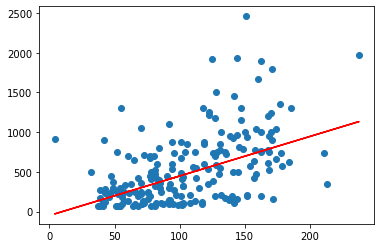

In [42]:

plt.scatter(X_train,y_train)
plt.plot(X_train,y_pred,color="r")

In [8]:
from sklearn.linear_model import LinearRegression
lm_model=LinearRegression().fit(X_train,y_train)
lm_pred=lm_model.predict(X_train)
print("y= {0} +{1} x".format(lm_model.intercept_,lm_model.coef_[0]))

y= -4.648694722336131 +-1.773248821012152 x


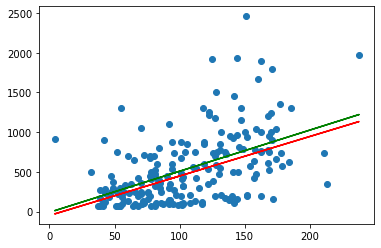

In [45]:

plt.scatter(X_train,y_train)
plt.plot(X_train,lm_pred,color="g")
plt.plot(X_train,y_pred,color="r")

In [46]:
# yesil dogru regresyon modeli
# kırmızı dogru svr modeli
# svr robasttır.aykırı gözlemlerin etkisi svr da biraz daha düşüktür.

# SVR - TAHMİN

In [47]:
svr_model.predict([[91]])

array([403.52804878])

In [49]:
y_pred=svr_model.predict(X_test)

In [50]:
np.sqrt(mean_squared_error(y_test,y_pred))

459.0187960365147

In [51]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

## SVR - MODEL TUNİNG

In [52]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svr_params={"C":np.arange(0.1,2,0.1)}
svr_cv_model=GridSearchCV(svr_model,svr_params,cv=10).fit(X_train,y_train)

In [58]:
svr_cv_model.best_params_# en iyi parametre 

{'C': 0.1}

In [61]:
svr_tuned=SVR("linear",C=pd.Series(svr_cv_model.best_params_)[0]).fit(X_train,y_train)

In [62]:
y_pred=svr_tuned.predict(X_test)

In [63]:
np.sqrt(mean_squared_error(y_test,y_pred))# x_test[hits ] lerin calıstırıldıgı kod blogu ile cıkan hata

458.198966781116

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))# direk veri setinin kendisinin calıstırılmasyıyla cıkan hata 

# Dogusal Olmayan SVR

In [2]:
# Aykırı degerler EKK Dogrusunu'  kendilerine dogru cekerler .Ama SVR aykırı degerlere karsı daha dayanıklıdır.


In [9]:
hit=pd.read_csv("original.csv")# American basketbol ligi 
df=hit.copy()
df=df.dropna()
dms= pd.get_dummies(df[['League','Division','NewLeague']])
y=df["Salary"]
X_= df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
# veri setini test ve train olarak ayırdık
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                              random_state=42)
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training= df.copy()# tüm veri seti
print("training",training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


In [11]:
from sklearn.svm import SVR
svr_rbf=SVR("rbf").fit(X_train,y_train)

C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Dogrusal Olmayan SVR - TAHMİN

In [13]:
y_pred=svr_rbf.predict(X_test)

In [14]:
np.sqrt(mean_squared_error(y_test,y_pred))

473.4445984431814

## Dogrusal Olmayan SVR - MODEL TUNİNG

In [16]:
svr_rbf

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
svr_params={"C":[0.1,0.4,5,10,20,30,40,50]}
svr_cv_model=GridSearchCV(svr_rbf,svr_params,cv=10)
svr_cv_model.fit(X_train,y_train)

C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.4, 5, 10, 20, 30, 40, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [18]:
svr_cv_model.best_params_

{'C': 20}

In [20]:
svr_tuned=SVR("rbf",C=pd.Series(svr_cv_model.best_params_)[0]).fit(X_train,y_train)

C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [22]:
y_pred=svr_tuned.predict(X_test)

In [23]:
np.sqrt(mean_squared_error(y_test,y_pred))

472.20974524750574

# Yapay Sinir Ağları

* İnsan beyninin bilgi işleme şeklini referans alan sınıflandırma ve regresyon problemleri için kullanılabilen kuvvetli makine öğrenmesi algortimalarından birisidir.

In [ ]:
# amacımız her zman hata kareler toplamını minimimize edecek sekilde 
# kural setleri cıkarmaktır.

In [25]:
# back propogation:geriye yayılımlı ,bu algortima optimum parametreleri bulmak icin etkili calısan bir algoritmadır.
# delta öğrenme kuralını kullanır.

# Yapay Sinir Agları - Çok Katmanlı Algılayıcı

In [26]:
hit=pd.read_csv("original.csv")# American basketbol ligi 
df=hit.copy()
df=df.dropna()
dms= pd.get_dummies(df[['League','Division','NewLeague']])
y=df["Salary"]
X_= df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
# veri setini test ve train olarak ayırdık
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                              random_state=42)
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training= df.copy()# tüm veri seti
print("training",training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


In [29]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [32]:
X_train_scaled=scaler.transform(X_train)

In [33]:
X_test_scaled=scaler.transform(X_test)

In [34]:
from sklearn.neural_network import MLPRegressor

In [45]:
mlp_model=MLPRegressor(hidden_layer_sizes=[100,20]).fit(X_train_scaled,y_train)

C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [46]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=[100, 20], learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [47]:
mlp_model.n_layers_#katman sayısı
# girdi katmanı
# gizli katman
#cıktı katmanı

4

In [48]:
mlp_model.hidden_layer_sizes# gizli katman sayısı

[100, 20]

## Yapay Sinir Agları - TAHMİN

In [49]:
mlp_model.predict(X_train_scaled)[0:5]

array([116.13515873, 458.53910034, 305.94347982, 104.14187333,
        75.55782545])

In [50]:
y_pred=mlp_model.predict(X_test_scaled)

In [51]:
np.sqrt(mean_squared_error(y_test,y_pred))

422.63308991889545

# Yapay Sinir Agları - MODEL TUNİNG

In [52]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=[100, 20], learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [55]:
mlp_params={"alpha":[0.1,0.01,0.02,0.05],
           "hidden_layer_sizes":[(20,20),(100,50,150),(300,200,150)],
           "activation":["relu","logistic"]}
#hidden layerda katmanlarda kullanılan nöron sayılarını verdik
# (20,50)#2 KATMANLI DEMEK
# (100,50,150)# 3 katmanlı demek 


In [57]:
mlp_cv_model=GridSearchCV(mlp_model,mlp_params,cv=10)

In [58]:
mlp_cv_model.fit(X_train_scaled,y_train)

C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=[100, 20],
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_iter=200,
                                    momentum=0.9, n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=None, shuffle=True,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'activation': ['relu', 'logistic'],
             

In [59]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.02, 'hidden_layer_sizes': (100, 50, 150)}

In [60]:
mlp_tuned=MLPRegressor(alpha=0.02,hidden_layer_sizes=(100,50,150))

In [61]:
mlp_tuned.fit(X_train,y_train)

C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.02, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 50, 150), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [62]:
y_pred=mlp_tuned.predict(X_test)

In [63]:
np.sqrt(mean_squared_error(y_test,y_pred))

356.5388084630147

# CART - Classification and Regresyon Trees

* Amaç :Veri seti içerisindeki karmasık yapıları basit karar yapılarına dönüştürmektir.Heterojen veri setleri belirlenmis  bir hedef degiskene göre homojen alt gruplara ayrılır.
    

In [1]:
# bagımlı degiskeni acıklaması bakımından degiskenlerin bagımlı degisken üzerindeki etkilerini bu yapılarla cok iyi görmüs oluruz.
# genellenebilirlik kaygısı yoksa CART modelleri uygulanması ve basarılı olmasıyla etkilidir.

# CART - MODEL

In [77]:
hit=pd.read_csv("original.csv")# American basketbol ligi 
df=hit.copy()
df=df.dropna()
dms= pd.get_dummies(df[['League','Division','NewLeague']])
y=df["Salary"]
X_= df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
# veri setini test ve train olarak ayırdık
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                              random_state=42)
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training= df.copy()# tüm veri seti
print("training",training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


In [6]:
X_train=pd.DataFrame(X_train["Hits"])
X_test=pd.DataFrame(X_test["Hits"])

In [15]:
cart_model=DecisionTreeRegressor(max_leaf_nodes=10)

In [16]:
cart_model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=10, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [17]:
cart_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=10, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

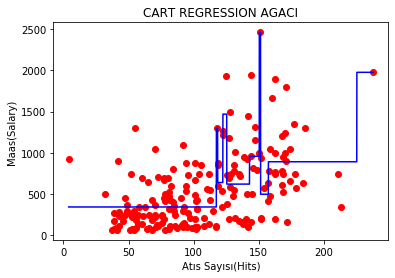

In [18]:
# Dallanmaları görmek istersek

X_grid=np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X_train,y_train,color='red')
plt.plot(X_grid,cart_model.predict(X_grid),color='blue')
plt.title('CART REGRESSION AGACI')
plt.xlabel('Atıs Sayısı(Hits)')
plt.ylabel('Maas(Salary)');

In [19]:
#!pip install skompiler

  Created wheel for skompiler: filename=SKompiler-0.5.5-py3-none-any.whl size=57151 sha256=d31425a42186d7a663ff45ce360a364cc04f521d7081258ed89c163b365c5afe
  Stored in directory: c:\users\aayse\appdata\local\pip\cache\wheels\1f\f6\09\b8aec43d39ab30463488d91526f29ba56155a6a6d61cf69986
Successfully built skompiler


In [20]:
from skompiler import skompile

In [23]:
# python kodu olarak bu karar agacının karar yapsının kodunu bize verdi
print(skompile(cart_model.predict).to("python/code"))# bir karar agacının karar modelini çıkarttık

(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)



# CART- TAHMİN

In [24]:
x=[91]# x degerini verdik

In [25]:
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)
# ve tahmin sonucunu ürettik

345.2011551724138

In [26]:
cart_model.predict(X_test)[5]

345.2011551724138

In [27]:
cart_model.predict([[91]])

array([345.20115517])

In [30]:
y_pred=cart_model.predict(X_test)

In [31]:
np.sqrt(mean_squared_error(y_test,y_pred))

486.34593105235456

# CART - MODEL TUNİNG

In [78]:
cart_model=DecisionTreeRegressor()

In [79]:
cart_model.fit(X_train,y_train)
y_pred=cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

524.2554537583406

In [80]:
cart_params={"min_samples_split":range(2,100),
       "max_leaf_nodes":range(2,10)}

In [81]:
cart_cv_model=GridSearchCV(cart_model,cart_params,cv=10)

In [84]:
cart_cv_model.fit(X_train,y_train)

C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sco

In [85]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 37}

In [90]:
cart_tuned=DecisionTreeRegressor(max_leaf_nodes=9,min_samples_split=37)

In [91]:
cart_tuned.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=9, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=37, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [92]:
y_pred=cart_tuned.predict(X_test)

In [93]:
np.sqrt(mean_squared_error(y_test,y_pred))

376.39788207109865

# BAGGED TREES - TEORİ
* Bagging:
    - Temeli bootstrap yöntemi ile olusturulan birden fazla karar agacının ürettigi tahminlerinin bir araya getirilerek degerlendirilmesine dayanır

In [94]:
# 1,2,3....................m

# T adet agac icin n'er adet gözlem (n<m) boostrap yöntemi ile secilir.
# T adet karar agacı modelinin ürettigi T adet tahmin degerini bir araya getir.
# varyansı düsüren ve ezberlemeye karsı dayanıklı olan bir yöntemdir.

# Bagged Trees Regresyon - MODEL

In [95]:
hit=pd.read_csv("original.csv")# American basketbol ligi 
df=hit.copy()
df=df.dropna()
dms= pd.get_dummies(df[['League','Division','NewLeague']])
y=df["Salary"]
X_= df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
# veri setini test ve train olarak ayırdık
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                              random_state=42)
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training= df.copy()# tüm veri seti
print("training",training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


In [97]:
# boostrap örneklerini gözlemlemek icin boostrap_features ı True yaptık.
bag_model=BaggingRegressor(bootstrap_features=True)
bag_model.fit(X_train,y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=True,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [98]:
# n_estimators =10 demek 10 tane agac olusturulacak demektir.

In [99]:
bag_model.n_estimators

10

In [101]:
bag_model.estimators_# her birisi birbirinden farklı agaclardır

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=1898307916, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=674603258, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_w

In [104]:
bag_model.estimators_samples_# her bir agactaki örnekleri alıyoruz

[array([159, 188, 153,   8, 167,  92,  58, 159,  17, 180, 128, 121, 117,
         97,  42, 170,  94,  35, 127,  79,  87,  27, 134, 188, 150, 164,
        185,  60, 190, 172, 152,  25,  51, 145, 181,  85,  65, 142, 181,
        161,  92, 126,  38, 150, 177, 111,  78,  13,  60,  79, 176, 160,
        146,  24,  51, 163,  40,  82,  65, 116,  22,  87,  91, 126, 183,
        109,  52,  96, 112,  65,  90,   5, 100, 109, 148,  67, 196,  25,
        126,  83, 121, 146,  44,  13, 137, 196,  66, 116, 115, 124,  50,
        153, 148,   6, 122, 185,  61, 137,   0, 166,  71,  28, 121,  55,
        145,  46, 173,  98, 130,  85,   6, 141, 196, 104,  74,  68, 118,
        175,   5,  13,  62,  87, 108,  50, 158,  32, 193, 183, 110, 129,
         95, 164, 163,  91, 161, 192, 167, 125, 102, 141, 192, 162, 186,
         84, 128,  86,  69,  81, 151, 117, 191, 187, 192, 155, 139,  63,
        187, 191,  28, 159,   4,  80,  80, 113, 119,  82,  83,  58, 154,
        135,  98, 140,  31,  21, 130,  40, 100,   0

In [105]:
# her bir agacın bagımsız degiskenlerine ulasmak istersek
bag_model.estimators_features_

[array([ 1, 13, 10,  0, 18,  0,  6, 10,  9,  6, 16,  1,  7,  3, 11, 14, 13,
        17,  8]),
 array([ 6, 11, 18,  0,  8, 11,  4,  7, 12,  3, 17,  8, 15, 15, 18, 11,  8,
         3,  7]),
 array([10,  3, 13, 13, 18, 11,  1, 16,  1,  8, 14, 15, 14,  8,  1,  7,  3,
        18,  1]),
 array([ 4,  7,  1,  8, 13, 15,  7, 11, 18, 11, 12,  0,  0, 10, 12, 12,  1,
         3, 16]),
 array([ 4, 12, 11,  5, 15,  2,  3, 12,  3, 10,  5, 16, 16,  1, 13,  0,  4,
        16,  6]),
 array([17,  7, 14, 14, 16, 13,  3, 10,  5, 11,  7,  2,  7,  2, 13,  9,  2,
         0,  6]),
 array([ 7, 13, 18,  3,  7, 17, 12,  3,  9, 12,  8, 11, 14, 10,  5,  7,  9,
        13,  0]),
 array([11, 10, 16,  3, 15,  4, 12,  1, 12, 12, 16,  7,  6,  9,  2, 18,  9,
        13,  4]),
 array([ 2, 16, 11, 14,  4, 14,  4,  1,  4, 13, 15, 12, 16, 16, 12, 14,  8,
        17, 10]),
 array([13, 17,  9,  9, 16,  7,  6,  4, 18, 17,  6, 10, 12, 12,  8,  2, 12,
         9,  8])]

In [106]:
# her bir modele özel degerlere erismek isteyelim
bag_model.estimators_[0] # sadece 1. modelin özelliklerine erisildi

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1898307916, splitter='best')

In [107]:
# Sonuc olarak bagging  veri setinin icerisinden birden fazla agacı aynı anda olusturark bir tahmin yaklasımı yapar.


# Bagged Trees- TAHMİN

In [108]:
y_pred=bag_model.predict(X_test)

In [109]:
np.sqrt(mean_squared_error(y_test,y_pred))# bu elde ettigimiz tahmin
# her bir olusturulan tahminlerin biraraya gelerek olusturdugu tahmindir.

401.67727493821906

In [110]:
# 1.agaca gidip onunla tahmin işlmei gerceklestirdik
# sadece agacın tahmin basarısını görmek istedik
iki_y_pred=bag_model.estimators_[1].fit(X_train,y_train).predict(X_test)

In [111]:
np.sqrt(mean_squared_error(y_test,iki_y_pred))

504.8102615395575

In [112]:
# agacların her birisine ayrı ayrı erisip tahmin hatalarını gözlemleyebilirz.
yedi_y_pred=bag_model.estimators_[6].fit(X_train,y_train).predict(X_test)
np.sqrt(mean_squared_error(y_test,yedi_y_pred))

449.79070608474353

# Bagging - MODEL TUNİNG

In [113]:
bag_model=BaggingRegressor(bootstrap_features=True)
bag_model.fit(X_train,y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=True,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [114]:
bag_params={"n_estimators":range(2,20),
           }

In [115]:
bag_cv_model=GridSearchCV(bag_model,bag_params,cv=10)

In [116]:
bag_cv_model.fit(X_train,y_train)

C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=True,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='warn', n_jobs=None, param_grid={'n_estimators': range(2, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [117]:
bag_cv_model.best_params_

{'n_estimators': 6}

In [121]:
bag_tuned=BaggingRegressor(n_estimators=6,random_state=45)
bag_tuned.fit(X_train,y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=6, n_jobs=None,
                 oob_score=False, random_state=45, verbose=0, warm_start=False)

In [122]:
y_pred=bag_tuned.predict(X_test)

In [124]:
np.sqrt(mean_squared_error(y_test,y_pred))

359.9759709118334

# Random Forests -TEORİ
* Temeli birden çok karar agacının ürettigi tahminleri bir araya getirilerek degerlendirilmesine dayanır
    - Bagging ile Random Subspace(rastgele alt küme secme islemi) yöntemlerinin birlesimi ile olusturulmustur.
    - Agaclar icin gözlemler bootstrap rastgele örnek secim yöntemi ile degiskenler random subspace yöntemi ile secilir
    - Karar agacının her bir dügümünden en iyi dallara ayırıcı(bilgi kazancı) degisken tüm degiskenler arasından rastgele secilen daha az sayıdaki degisken arasından secilir.
    - Agac olusturmada veri setinin 2/3 ü kullanılır.Dısarda kalan veri agacların performans degerlendirmesi ve degisken önemlerinin belirlenmesi icin kullanılır.
    - Her düğüm noktasında rastgele degisken secimi yapılır.(regresyonda p/3,sınıflandırmada karakök p)
    - Nihai tahmin için agaclardan tahmin degerleri talep edilirken her bir agacoın daha önce hesaplanan hata oranları göz önüne alınarak agaclara agırlık verilir.

In [125]:
# Her bir agac olusturulduktan sonra isabetli tahmin yapanlara daha fazla söz hakkı tanır.
#İsabetsiz tahmin yapanlara daha az ağırlık verir.

# Random Forest - MODEL

In [127]:
hit=pd.read_csv("original.csv")# American basketbol ligi 
df=hit.copy()
df=df.dropna()
dms= pd.get_dummies(df[['League','Division','NewLeague']])
y=df["Salary"]
X_= df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
# veri setini test ve train olarak ayırdık
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                              random_state=42)

In [128]:
from sklearn.ensemble import RandomForestRegressor

In [129]:
rf_model=RandomForestRegressor(random_state=42)

In [130]:
rf_model.fit(X_train,y_train)

C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [131]:
# n_estimators=10 ön tanımlı degeriyle olusmus
# tahmin yapılcak agac sayısıdır.
#max_features: bölünme işlemlerinde göz önünde bulundurulacak olan max degisken sayısıdr.
# min_sample_split: bir node bölünmeden önce bu nodedaki minimum gözlem sayısıdrı
#min_samples_leaf:leaf node daki minimum gözlem sayısıdır.

In [132]:
# random forest da önemli olan iki paramtre vardır
#birincisi: fit edilecek agac sayısı olan n_estimators
#ikincisi: her bölünmede göze alınacak olan degisken sayıs(max_features)
# ücüncü olarak da agacın derinlik sayısını söyleyebiliriz.(max_depth)

# Random Forest - TAHMİN

In [133]:
y_pred=rf_model.predict(X_test)

In [134]:
np.sqrt(mean_squared_error(y_test,y_pred))

373.04044281427

# Random Forest - MODEL TUNİNG

In [139]:
rf_params={"max_depth":list(range(1,10)),
         "max_features":[3,5,10,15],
         "n_estimators":[100,200,500,1000,2000]}#tahmin üretecek olan tahminci sayısı


In [140]:
rf_model=RandomForestRegressor(random_state=42)

In [142]:
rf_cv_model=GridSearchCV(rf_model,
                         rf_params
                         ,cv=10,
                         n_jobs=-1)#islemcilerin tam performanslı kullanılmasını saglar

In [143]:
rf_cv_model.fit(X_train,y_train)

C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7,

In [144]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 200}

In [145]:
rf_tuned=RandomForestRegressor(max_depth= 8, max_features= 3,n_estimators=200)

In [146]:
rf_tuned=rf_tuned.fit(X_train,y_train)

In [148]:
y_pred=rf_tuned.predict(X_test)

In [149]:
np.sqrt(mean_squared_error(y_test,y_pred))

346.8644837688298

Text(0.5, 0, 'Degiskenlerin Önem Düzeyleri')

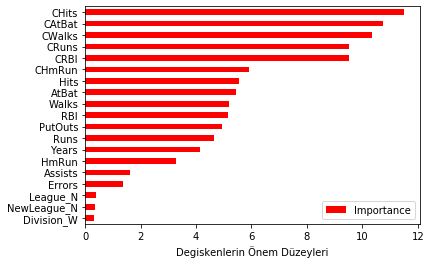

In [150]:
# Degiskenlerin önem düzeylerine ihtiyacımız oldugunu düsünelim
Importance=pd.DataFrame({"Importance":rf_tuned.feature_importances_*100},
                       index=X_train.columns)
Importance.sort_values(by="Importance",
                       axis=0,
                       ascending=True).plot(kind="barh",
                                            color="r")

plt.xlabel("Degiskenlerin Önem Düzeyleri")

# Gradient Boosting Machines
* AdaBoost'un sınıflandırma ve regresyon problemlerine kolayca uygulanabilen genellestirilmis versiyonudur.
* Artıklar üzerine tek bir tahmnsel model formunda olan modeller serisi kurulur

** Boosting Yöntemlerine Giriş
* Zayıf öğrenicileri bir araya getirip güçlü bir öğrenici ortaya çıkarmak fikrine dayanır(1990)

**  Adaptive Boosting (AdaBoost)
* Zayıf sınıflandırıcıların bir araya gelerek güçlü bir sınıflandırıcı olusturması fikrini hayata geciren algoritmadır.(1996)

     - Boosting yöntemlerinde agacların birbirine bagımlılıgı söz konusudur
     - Bagging yöntemlerinde agaclar  bagımsızdır.


* Boosting problemleri artıkların optimizasyonu problemi olarak görülmelidir

* Gradient Boosting Machines
    - Gradient boosting tek bir tahminsel model formunda olan modeller serisi olusturur.
    - Seri içeirisindeki bir model serideki bir önceki modelin tahmin artıklarının/hatalarının (residuals) üzerine kurularak (fit) olusturulur.
    - GBM diferansiyellenebilen herhangi bir kayıp fonksiyonu optimize edilebilen Gradient descent algoritmasını kullanmakta
    - GB bir çok temel öğrenci tipi (base learner type) kulllanabilir (Trees,linear terms,splines,...)
    - Cost fonksiyonları ve link fonksiyonları modeifiye edilebilirler
    - Boosting +Gradient Descent 

# Gradient Boosting Machines - MODEL

In [6]:
hit=pd.read_csv("original.csv")# American basketbol ligi 
df=hit.copy()
df=df.dropna()
dms= pd.get_dummies(df[['League','Division','NewLeague']])
y=df["Salary"]
X_= df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
# veri setini test ve train olarak ayırdık
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                              random_state=42)

In [7]:
from sklearn.ensemble import GradientBoostingRegressor

In [8]:
gbm_model=GradientBoostingRegressor()

In [9]:
gbm_model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

# Gradient Boosting Machine - TAHMİN

In [10]:
y_pred=gbm_model.predict(X_test)

In [11]:
np.sqrt(mean_squared_error(y_test,y_pred))# ilkel test hatamız

354.9923871127796

# Gradient Boosting Machine- MODEL TUNİNG 

In [12]:
gbm_params={'learning_rate':[0.001,0.01,0.1,0.2],
           'max_depth':[3,5,8,50,100],
           'n_estimators':[200,500,1000,2000],
           'subsample':[1,0.5,0.75]}

In [13]:
gbm=GradientBoostingRegressor()
gbm_cv_model=GridSearchCV(gbm,gbm_params,cv=10,n_jobs=-1,verbose=2)
gbm_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 14.6min finished
C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite...
                             

In [14]:
gbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 2000, 'subsample': 0.5}

In [15]:
gbm_tuned=GradientBoostingRegressor(learning_rate=0.1 ,
                                   max_depth=3 ,
                                   n_estimators=2000 ,
                                   subsample=0.5 )
gbm_tuned=gbm_tuned.fit(X_train,y_train)

In [16]:
y_pred=gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

365.96802900988877

Text(0.5, 0, 'Degiskenlerin Önem Düzeyleri')

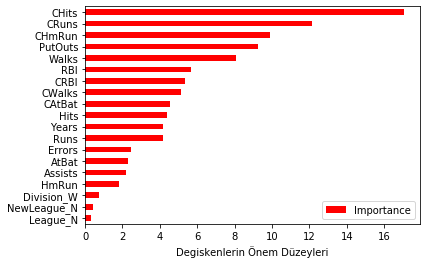

In [17]:
# Degiskenlerin önem düzeylerine ihtiyacımız oldugunu düsünelim
Importance=pd.DataFrame({"Importance":gbm_tuned.feature_importances_*100},
                       index=X_train.columns)
Importance.sort_values(by="Importance",
                       axis=0,
                       ascending=True).plot(kind="barh",
                                            color="r")

plt.xlabel("Degiskenlerin Önem Düzeyleri")

# eXtreme Gradient Boosting ( XGBoost)
* XGBoost,GBM'in hız ve tahmin performansını artırmak üzere optimize edilmis; ölceklenebilir ve farklı platformlarda entegre edilebilir halidir.(2014-Tianqi Chen)

* XGBoost
 - R,Python,Hadoop, Scala, Julia ile kullanılabilir
 - Ölçeklenebilirdir
 - Hızlıdır
 - Tahmin basarısı yüksektir
 - Bir çok kaggle yarışmasında basarısını kanıtlamıstır

# XGBoost - MODEL

In [18]:
hit=pd.read_csv("original.csv")# American basketbol ligi 
df=hit.copy()
df=df.dropna()
dms= pd.get_dummies(df[['League','Division','NewLeague']])
y=df["Salary"]
X_= df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
# veri setini test ve train olarak ayırdık
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                              random_state=42)

In [19]:
# !pip install xgboost

In [20]:
# not: xgboostun kendi veri yapısını kullanabilirseniz daha performanslı
# sonuclar elde edebilirsiniz.
import xgboost as xgb

In [22]:
# bu kulanım  xgboostun kendi veri yapısı
DM_train=xgb.DMatrix(data=X_train,label=y_train)#train seti
DM_test=xgb.DMatrix(data=X_test,label=y_test)# test seti

In [23]:
from xgboost import XGBRegressor

In [25]:
xgb_model= XGBRegressor().fit(X_train,y_train)

# XGBoost - TAHMİN

In [26]:
y_pred=xgb_model.predict(X_test)

In [27]:
np.sqrt(mean_squared_error(y_test,y_pred))

355.4651481224188

# XGBoost - MODEL TUNİNG

In [28]:
xgb_model

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [30]:
xgb_params={'colsample_bytree':[0.4,0.5,0.6,0.9,1],
           'n_estimators':[100,200,500,1000],
           'max_depth':[2,3,4,5,6],
           'learning_rate':[0.1,0.01,0.5]}

In [31]:

xgb=XGBRegressor()
xgb_cv_model=GridSearchCV(xgb,
                          xgb_params,
                          cv=10,
                         n_jobs=-1,
                         verbose=2)


In [32]:
xgb_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  4.6min finished
C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constrai...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=False, verbosity=None),
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1

In [33]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 500}

In [38]:
xgb_tuned=XGBRegressor(colsample_bytree=0.5,
                      learning_rate=0.1,
                      max_depth=2,
                      n_estimators=500)
xgb_tuned=xgb_tuned.fit(X_train,y_train)

In [39]:
y_pred=xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

346.0275157777717

# Light GBM
* Light GBM, XGBoost'un eğitim süresi performansını arttırmaya yönelik geliştirilen bir diğer GBM türüdür.

*  Daha performanslı
* Lewel - wise büyüme stratejisi yerine leaf_wise büyüme stratejisi
* Breadth- first search (BFS) yerine depth - first search(DFS)

In [40]:
# XGBoostun eğitim süresi çok uzun sürmektedir.
# XGBoost daha genis kapsamlı ilk arama yapar.
# Light GBM daha derin kapsamlı ilk arama yapar.

# Light GBM - MODEL

In [41]:
hit=pd.read_csv("original.csv")# American basketbol ligi 
df=hit.copy()
df=df.dropna()
dms= pd.get_dummies(df[['League','Division','NewLeague']])
y=df["Salary"]
X_= df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
# veri setini test ve train olarak ayırdık
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                              random_state=42)

In [42]:
#!pip install lightgbm

In [43]:
from lightgbm import LGBMRegressor

In [44]:
lgbm=LGBMRegressor()

In [45]:
lgbm_model=lgbm.fit(X_train,y_train)

# Light GBM- TAHMİN

In [46]:
y_pred=lgbm_model.predict(X_test,num_iteration=lgbm_model.best_iteration_)

In [47]:
np.sqrt(mean_squared_error(y_test,y_pred))

363.8712087611089

# Light GBM - MODEL TUNİNG

In [48]:
lgbm_model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [51]:
lgbm_params={
    'colsample_bytree':[0.4,0.5,0.6,0.9,1],
    'learning_rate':[0.01,0.1,0.5,1],
    'n_estimators':[20,40,100,200,500,1000],
'max_depth':[1,2,3,4,5,6,7,8]
}

lgbm=LGBMRegressor()
lgbm_cv_model=GridSearchCV(lgbm,lgbm_params,cv=10,n_jobs=-1,verbose=2)

In [52]:
lgbm_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 204 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 696 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 1508 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 2640 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4100 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 5880 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 7360 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 8574 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 9600 out of 9600 | elapsed:  6.2min finished
C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': 

In [53]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 40}

In [56]:
lgbm_tuned=LGBMRegressor(learning_rate=0.1,
                        max_depth=5,
                        n_estimators=40,
                        colsample_bytree=0.4)

lgbm_tuned=lgbm_tuned.fit(X_train,y_train)

In [57]:
y_pred=lgbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

377.8415676535648

# Category Boosting (CatBoost)
* Kategorik degiskenler ile otomatik olarak mücadele edebilen ,hızlı,basarılı bir diger GBM türevi(Yandex 2017)

* Category Boosting (CatBoost)
    - Kategorik degisken destegi
    - Hızlı ve ölçeklenebilir GPU destegi
    - Daha basarılı tahminler
    - Hızlı train ve hızlı tahmin
    - Rusyanın ilk açık kaynak kodlu ,basarılı ML çalışması

# CatBoost - MODEL 

In [58]:
hit=pd.read_csv("original.csv")# American basketbol ligi 
df=hit.copy()
df=df.dropna()
dms= pd.get_dummies(df[['League','Division','NewLeague']])
y=df["Salary"]
X_= df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
# veri setini test ve train olarak ayırdık
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                              random_state=42)

In [59]:
!pip install catboost

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=ee3471d9a15a61d4df4c6f65d1d4972a288d764c62743fefd7a7165bf1e8c594
  Stored in directory: c:\users\aayse\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [62]:
from catboost import CatBoostRegressor

In [65]:
catb=CatBoostRegressor()
catb_model=catb.fit(X_train,y_train)

Learning rate set to 0.029229
0:	learn: 438.1974206	total: 57.1ms	remaining: 57.1s
1:	learn: 432.4168868	total: 59.6ms	remaining: 29.7s
2:	learn: 426.3836690	total: 62.1ms	remaining: 20.6s
3:	learn: 420.2261014	total: 64.5ms	remaining: 16.1s
4:	learn: 414.9976675	total: 66.8ms	remaining: 13.3s
5:	learn: 409.6125323	total: 69ms	remaining: 11.4s
6:	learn: 403.9277911	total: 71.3ms	remaining: 10.1s
7:	learn: 398.4395285	total: 73.6ms	remaining: 9.12s
8:	learn: 392.4517081	total: 76.1ms	remaining: 8.38s
9:	learn: 387.4871123	total: 80.5ms	remaining: 7.97s
10:	learn: 382.6230510	total: 84.5ms	remaining: 7.6s
11:	learn: 378.1012454	total: 88.4ms	remaining: 7.28s
12:	learn: 372.6002306	total: 92.7ms	remaining: 7.04s
13:	learn: 368.4682192	total: 96.6ms	remaining: 6.8s
14:	learn: 364.0565766	total: 102ms	remaining: 6.71s
15:	learn: 359.5683249	total: 106ms	remaining: 6.52s
16:	learn: 355.1782794	total: 109ms	remaining: 6.29s
17:	learn: 350.4689946	total: 112ms	remaining: 6.09s
18:	learn: 346.2

# CatBoost - TAHMİN

In [66]:
y_pred=catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

350.2683163098795

# CatBoost - MODEL TUNİNG

In [67]:
catb_params={'iterations':[200,500,1000,2000],
            'learning_rate':[0.01,0.03,0.05,0.1],
            'depth':[3,4,5,6,7,8]}



In [69]:
catb=CatBoostRegressor()

catb_cv_model=GridSearchCV(catb,catb_params,cv=10,n_jobs=-1,verbose=2)

In [70]:
catb_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 40.5min finished
C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0:	learn: 425.7900818	total: 1.3ms	remaining: 260ms
1:	learn: 404.8723520	total: 2.29ms	remaining: 227ms
2:	learn: 387.4057666	total: 3.34ms	remaining: 219ms
3:	learn: 372.2801584	total: 4.37ms	remaining: 214ms
4:	learn: 358.9204229	total: 5.28ms	remaining: 206ms
5:	learn: 347.0083933	total: 6.24ms	remaining: 202ms
6:	learn: 336.0130818	total: 7.3ms	remaining: 201ms
7:	learn: 324.3923300	total: 8.36ms	remaining: 201ms
8:	learn: 314.8690957	total: 9.37ms	remaining: 199ms
9:	learn: 308.5075563	total: 10.3ms	remaining: 197ms
10:	learn: 298.8587285	total: 11.2ms	remaining: 193ms
11:	learn: 294.7655438	total: 12.2ms	remaining: 191ms
12:	learn: 288.0697862	total: 13ms	remaining: 187ms
13:	learn: 282.6697154	total: 13.9ms	remaining: 184ms
14:	learn: 277.6121667	total: 14.7ms	remaining: 182ms
15:	learn: 273.4383979	total: 15.6ms	remaining: 179ms
16:	learn: 269.1556201	total: 16.4ms	remaining: 177ms
17:	learn: 264.8098704	total: 17.3ms	remaining: 175ms
18:	learn: 261.6700768	total: 18.1ms	remai

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostRegressor object at 0x0000022C09C64548>,
             iid='warn', n_jobs=-1,
             param_grid={'depth': [3, 4, 5, 6, 7, 8],
                         'iterations': [200, 500, 1000, 2000],
                         'learning_rate': [0.01, 0.03, 0.05, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [71]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.1}

In [72]:
catb_tuned=CatBoostRegressor(iterations=200,
                            learning_rate=0.1,
                            depth=3)
catb_tuned=catb_tuned.fit(X_train,y_train)

0:	learn: 425.7900818	total: 1.03ms	remaining: 205ms
1:	learn: 404.8723520	total: 2.15ms	remaining: 213ms
2:	learn: 387.4057666	total: 3.06ms	remaining: 201ms
3:	learn: 372.2801584	total: 3.95ms	remaining: 194ms
4:	learn: 358.9204229	total: 4.83ms	remaining: 188ms
5:	learn: 347.0083933	total: 5.75ms	remaining: 186ms
6:	learn: 336.0130818	total: 6.54ms	remaining: 180ms
7:	learn: 324.3923300	total: 7.35ms	remaining: 176ms
8:	learn: 314.8690957	total: 8.32ms	remaining: 177ms
9:	learn: 308.5075563	total: 9.3ms	remaining: 177ms
10:	learn: 298.8587285	total: 10.3ms	remaining: 177ms
11:	learn: 294.7655438	total: 11.2ms	remaining: 176ms
12:	learn: 288.0697862	total: 12.1ms	remaining: 174ms
13:	learn: 282.6697154	total: 13ms	remaining: 172ms
14:	learn: 277.6121667	total: 14ms	remaining: 173ms
15:	learn: 273.4383979	total: 15ms	remaining: 173ms
16:	learn: 269.1556201	total: 16ms	remaining: 172ms
17:	learn: 264.8098704	total: 16.7ms	remaining: 169ms
18:	learn: 261.6700768	total: 17.5ms	remaining:

In [73]:
y_pred=catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

344.3125832615482